## 数据处理用代码



0. 测量霍尔片的参数

斜率 slope = -21.135 mV/mA
霍尔灵敏度 K_H = -171.968 mV/(mA·T)
霍尔系数 R_H = -5.159e-04 m^3/C
载流子浓度 n = -1.21147e+22 m^-3
线性拟合 R² = 0.999998731


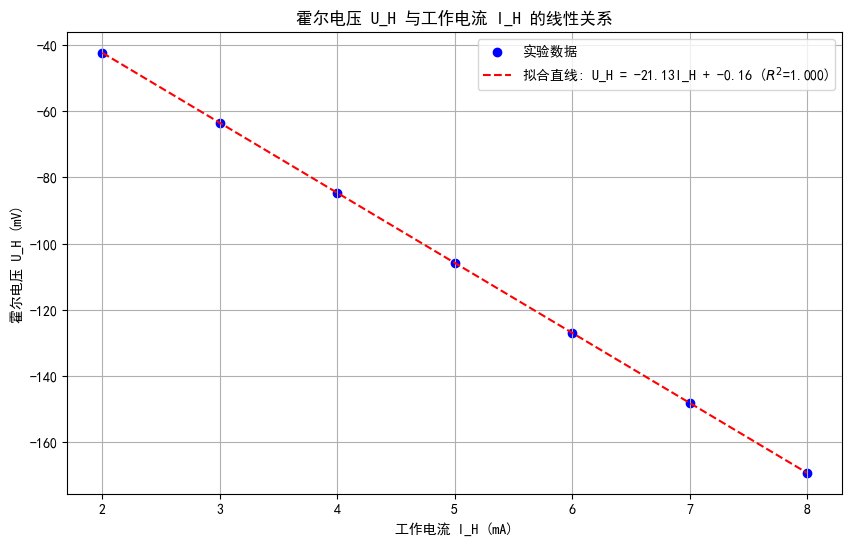

In [51]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
from scipy.stats import linregress

# 附录表一数据
I_H = np.array([2, 3, 4, 5, 6, 7, 8])  # mA
U_H = np.array([-42.45, -63.5, -84.7, -105.85, -127.05, -148.125, -169.175])  # mV
B = 0.1229  # T
L = 3e-4
b = 1e-4
d = 3e-6  # m
e = 1.6e-19  # C

# 线性回归
slope, intercept, r_value, _, _ = linregress(I_H, U_H)
K_H = slope / B  # 单位：mV/(mA·T)
R_H = K_H * d
n = 1 / (R_H * e)  # 载流子浓度，单位：m^-3

print(f"斜率 slope = {slope:.3f} mV/mA")
print(f"霍尔灵敏度 K_H = {K_H:.3f} mV/(mA·T)")
print(f"霍尔系数 R_H = {R_H:.3e} m^3/C")
print(f"载流子浓度 n = {n:.5e} m^-3")
print(f"线性拟合 R² = {r_value**2:.9f}")

# 绘制拟合曲线
plt.figure(figsize=(10,6))
plt.scatter(I_H, U_H, label='实验数据', color='blue')
plt.plot(I_H, slope * I_H + intercept, 'r--', label=f'拟合直线: U_H = {slope:.2f}I_H + {intercept:.2f} ($R^2$={r_value**2:.3f})')
plt.title('霍尔电压 U_H 与工作电流 I_H 的线性关系')
plt.xlabel('工作电流 I_H (mA)')
plt.ylabel('霍尔电压 U_H (mV)')
plt.grid(True)
plt.legend()
plt.show()

1. 磁场标定与磁场分布分析​


拟合结果:
磁场与电流拟合斜率 slope_BI = 0.000245 T/mA
磁场与电流拟合截距 intercept = 0.000231 T
线性拟合 R² = 0.999981269

磁场B值 (单位: T):
I_M =    0 mA, B = -2.180643e-04 T
I_M =  100 mA, B = 2.449589e-02 T
I_M =  200 mA, B = 4.924619e-02 T
I_M =  300 mA, B = 7.363304e-02 T
I_M =  400 mA, B = 9.838334e-02 T
I_M =  500 mA, B = 1.230610e-01 T
I_M =  600 mA, B = 1.471207e-01 T
I_M =  700 mA, B = 1.720527e-01 T
I_M =  800 mA, B = 1.960398e-01 T
I_M =  900 mA, B = 2.201723e-01 T
I_M = 1000 mA, B = 2.443774e-01 T


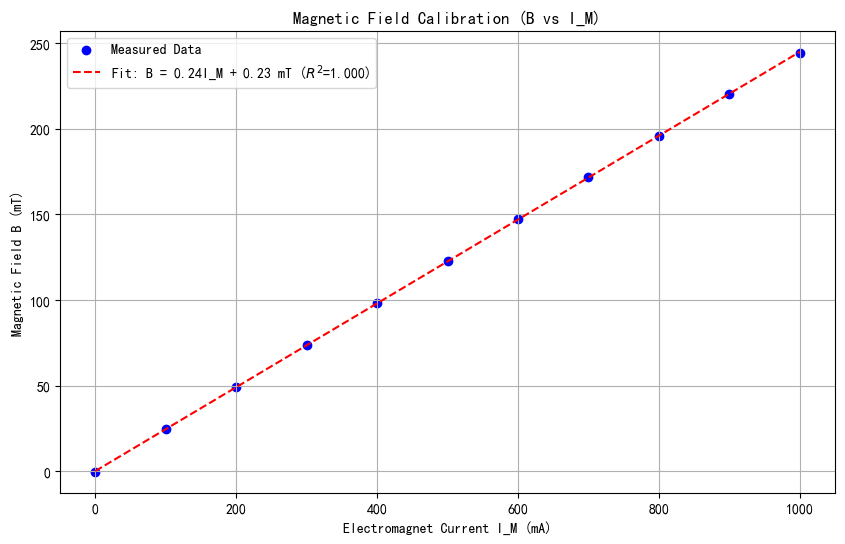

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.stats import linregress

# 磁场标定数据（附录表三）
I_M = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])  # mA
U_H = np.array([0.15, -16.85, -33.875, -50.65, -67.675, -84.65, -101.2, -118.35, -134.85, -151.45, -168.1])  # mV

# 霍尔系数参数（根据表一计算）
d = 3e-6  # m（霍尔片厚度）
I_H = 4e-3  # A（固定工作电流）

# 计算磁场B = U_H / (K_H * I_H)
B = (U_H * 1e-3) / (K_H * I_H)  # 转换为特斯拉

# 线性拟合B~I_M关系
slope_BI, intercept, r_value, _, _ = linregress(I_M, B)
fit_B = slope_BI * I_M + intercept

# 输出拟合结果
print("\n拟合结果:")
print(f"磁场与电流拟合斜率 slope_BI = {slope_BI:.6f} T/mA")
print(f"磁场与电流拟合截距 intercept = {intercept:.6f} T")
print(f"线性拟合 R² = {r_value**2:.9f}")
print("\n磁场B值 (单位: T):")
for i, b_val in enumerate(B):
    print(f"I_M = {I_M[i]:4.0f} mA, B = {b_val:.6e} T")

# 磁场标定曲线
plt.figure(figsize=(10,6))
plt.scatter(I_M, B*1e3, label='Measured Data', color='blue')
plt.plot(I_M, fit_B*1e3, 'r--', label=f'Fit: B = {slope_BI*1e3:.2f}I_M + {intercept*1e3:.2f} mT ($R^2$={r_value**2:.3f})')
plt.title('Magnetic Field Calibration (B vs I_M)')
plt.xlabel('Electromagnet Current I_M (mA)')
plt.ylabel('Magnetic Field B (mT)')
plt.grid(True)
plt.legend()
plt.show()

2. 迁移率线性回归分析​

slope = 0.001301
迁移率 μ = 0.671314 cm²/(V·s)


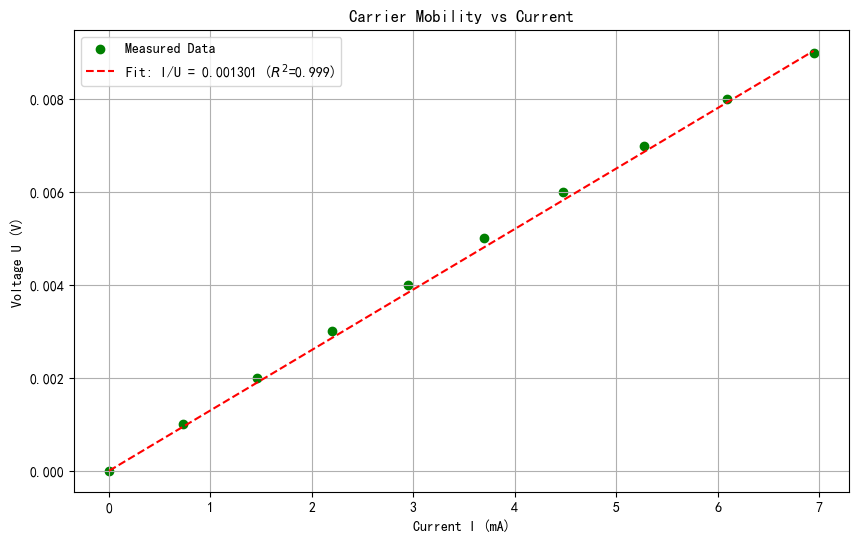

In [53]:
# 迁移率数据（附录表五）
I = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # mA
I = I * 1e-3  # 转换为A
U = np.array([0.001, 0.729, 1.458, 2.2, 2.946, 3.699, 4.474, 5.275, 6.094, 6.946])  # V

slope, intercept, r_value, _, _ = linregress(U, I)

mu = abs(K_H) * L / b * slope
print(f"slope = {slope:.6f}")
print(f"迁移率 μ = {mu:.6f} cm²/(V·s)")
# 绘制迁移率曲线
plt.figure(figsize=(10,6))
plt.scatter(U, I, label='Measured Data', color='green')
plt.plot(U, slope * U, 'r--', label=f'Fit: I/U = {slope:.6f} ($R^2$={r_value**2:.3f})')
plt.title('Carrier Mobility vs Current')
plt.xlabel('Current I (mA)')
plt.ylabel('Voltage U (V)')
plt.grid(True)
plt.legend()
plt.show()

3. 磁阻特性分析​

4. 磁场分布可视化​

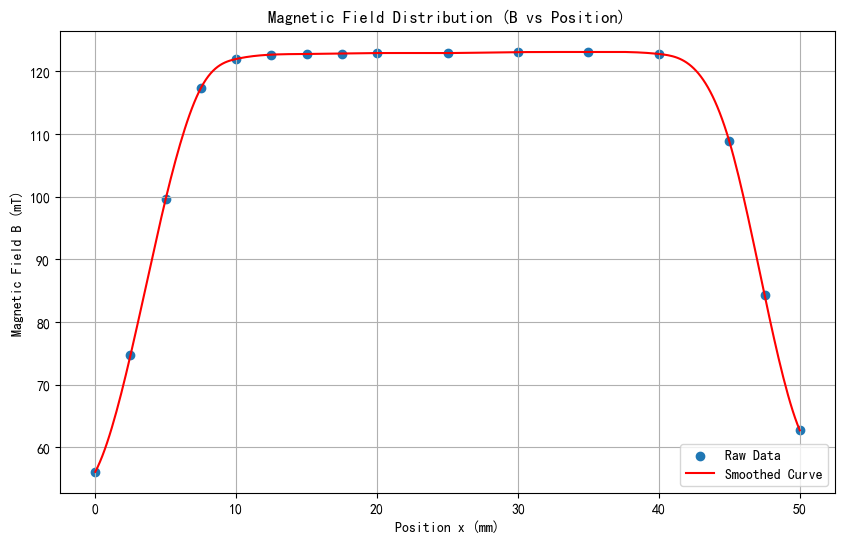

In [54]:
# 磁场分布数据（附录表四）
x = np.array([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 25, 30, 35, 40, 45, 47.5, 50])  # mm
B_x = np.array([-38.6, -51.4, -68.55, -80.725, -83.9, -84.375, -84.45, -84.5, -84.55, -84.55, -84.65, -84.675, -84.45, -74.85, -58, -43.15])  # mV
B_x = (B_x * 1e-3) / (K_H * I_H) * 1e3  # 转换为mT

# 样条插值平滑
tck = splrep(x, B_x, s=0)
x_new = np.linspace(0, 50, 300)
B_smooth = splev(x_new, tck)

# 绘制磁场分布
plt.figure(figsize=(10,6))
plt.scatter(x, B_x, marker='o', label='Raw Data')
plt.plot(x_new, B_smooth, 'r-', label='Smoothed Curve')
plt.title('Magnetic Field Distribution (B vs Position)')
plt.xlabel('Position x (mm)')
plt.ylabel('Magnetic Field B (mT)')
plt.grid(True)
plt.legend()
plt.show()

5. 磁电阻特性分析

零磁场电阻 R0 = 340.7333 Ω
最大磁场电阻 R_max = 658.5333 Ω
最大相对电阻变化 (ΔR/R0)_max = 0.9327

磁场和相对电阻变化关系:
I_M =    0 mA, B =   0.10 mT, R_B = 340.7333 Ω, ΔR/R0 = 0.0000
I_M =   50 mA, B =  12.33 mT, R_B = 345.6000 Ω, ΔR/R0 = 0.0143
I_M =  100 mA, B =  24.57 mT, R_B = 359.1333 Ω, ΔR/R0 = 0.0540
I_M =  150 mA, B =  36.80 mT, R_B = 379.9333 Ω, ΔR/R0 = 0.1150
I_M =  200 mA, B =  49.04 mT, R_B = 406.2667 Ω, ΔR/R0 = 0.1923
I_M =  250 mA, B =  61.27 mT, R_B = 436.0667 Ω, ΔR/R0 = 0.2798
I_M =  300 mA, B =  73.51 mT, R_B = 467.5333 Ω, ΔR/R0 = 0.3721
I_M =  350 mA, B =  85.74 mT, R_B = 495.8667 Ω, ΔR/R0 = 0.4553
I_M =  400 mA, B =  97.98 mT, R_B = 518.7333 Ω, ΔR/R0 = 0.5224
I_M =  500 mA, B = 122.45 mT, R_B = 548.2667 Ω, ΔR/R0 = 0.6091
I_M =  600 mA, B = 146.92 mT, R_B = 572.8667 Ω, ΔR/R0 = 0.6813
I_M =  700 mA, B = 171.39 mT, R_B = 595.6000 Ω, ΔR/R0 = 0.7480
I_M =  800 mA, B = 195.85 mT, R_B = 616.6667 Ω, ΔR/R0 = 0.8098
I_M =  900 mA, B = 220.32 mT, R_B = 637.6667 Ω, ΔR/R0 = 0.8715
I_M = 1000 mA, B = 244.79 

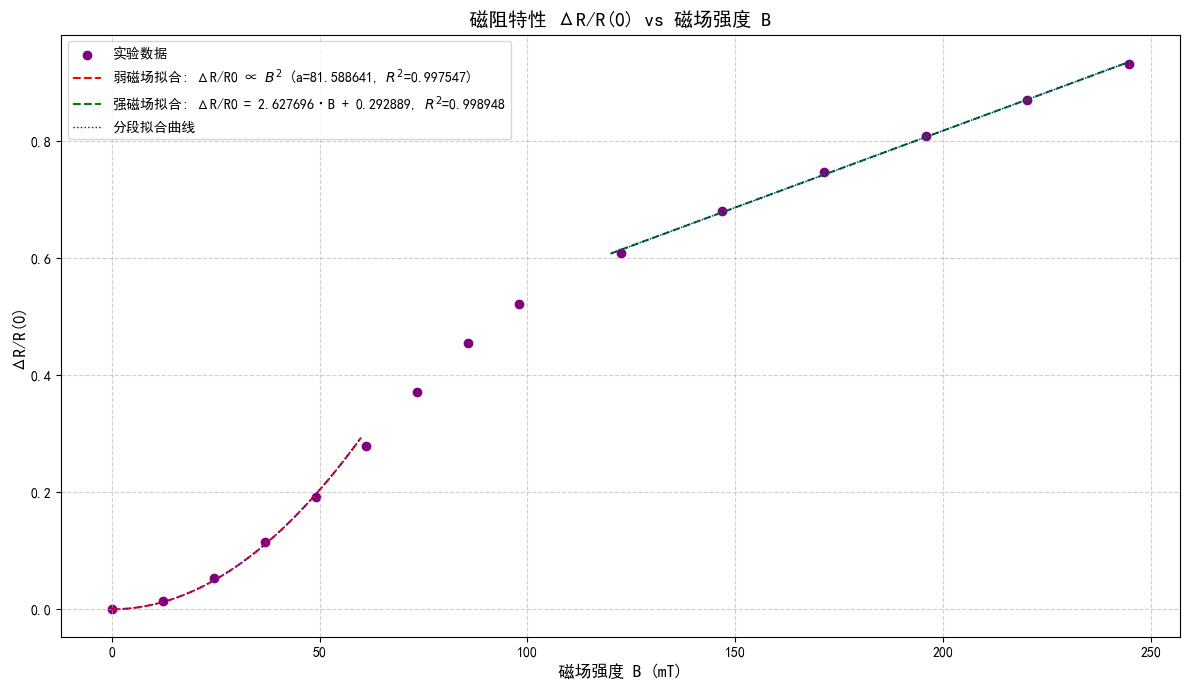

In [55]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 使用第1部分的磁场标定结果
I_M = np.array([0, 50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000])  # mA

# 计算对应磁场强度
B_m = slope_BI * I_M + intercept  # 使用之前计算的slope_BI和intercept

# ====== 步骤3：磁阻特性计算 ======
# 附录表六数据（磁阻元件在IM变化下的电压U_CD）
I_CD = 1.5e-3  # 恒流源电流(A)
U_CD = np.array([0.5111, 0.5184, 0.5387, 0.5699, 0.6094, 0.6541, 0.7013, 0.7438, 0.7781, 0.8224, 0.8593, 0.8934, 0.925, 0.9565, 0.9878])  # V

# 计算电阻R(B)和ΔR/R0
R_B = U_CD / I_CD  # 单位: Ω
R0 = R_B[0]  # 零磁场电阻
delta_R_over_R0 = (R_B - R0) / R0

# 输出关键数据
print(f"零磁场电阻 R0 = {R0:.4f} Ω")
print(f"最大磁场电阻 R_max = {R_B[-1]:.4f} Ω")
print(f"最大相对电阻变化 (ΔR/R0)_max = {delta_R_over_R0[-1]:.4f}")
print("\n磁场和相对电阻变化关系:")
for i in range(len(I_M)):
    print(f"I_M = {I_M[i]:4.0f} mA, B = {B_m[i]*1e3:6.2f} mT, R_B = {R_B[i]:.4f} Ω, ΔR/R0 = {delta_R_over_R0[i]:.4f}")
# ====== 步骤4：分区域拟合 ======
def weak_field(x, a): return a * x**2  # 弱磁场二次项
def strong_field(x, a, b): return a * x + b  # 强磁场一次项(带截距)
# 划分区域
mask_weak = B_m <= 60e-3  # B < 60mT
mask_strong = B_m >= 120e-3  # B > 120mT

# 弱磁场拟合
popt_weak, pcov_weak = curve_fit(weak_field, B_m[mask_weak], delta_R_over_R0[mask_weak])
y_pred_weak = weak_field(B_m[mask_weak], *popt_weak)
ss_tot_weak = np.sum((delta_R_over_R0[mask_weak] - np.mean(delta_R_over_R0[mask_weak]))**2)
ss_res_weak = np.sum((delta_R_over_R0[mask_weak] - y_pred_weak)**2)
r2_weak = 1 - (ss_res_weak / ss_tot_weak)

# 强磁场拟合
popt_strong, pcov_strong = curve_fit(strong_field, B_m[mask_strong], delta_R_over_R0[mask_strong])
y_pred_strong = strong_field(B_m[mask_strong], *popt_strong)
ss_tot_strong = np.sum((delta_R_over_R0[mask_strong] - np.mean(delta_R_over_R0[mask_strong]))**2)
ss_res_strong = np.sum((delta_R_over_R0[mask_strong] - y_pred_strong)**2)
r2_strong = 1 - (ss_res_strong / ss_tot_strong)



# 输出拟合结果
print("\n拟合结果:")
print(f"弱磁场系数 a = {popt_weak[0]:.6f} T^-2, R^2 = {r2_weak:.6f}")
print(f"强磁场系数 a = {popt_strong[0]:.6f} T^-1, b = {popt_strong[1]:.6f}, R^2 = {r2_strong:.6f}")
# ====== 步骤5：可视化 ======
plt.figure(figsize=(12, 7))
plt.scatter(B_m*1e3, delta_R_over_R0, label='实验数据', color='purple', marker='o')

# 绘制拟合曲线
B_weak = np.linspace(0, 60e-3, 100)
B_strong = np.linspace(120e-3, B_m.max(), 100)
plt.plot(B_weak*1e3, weak_field(B_weak, *popt_weak), 'r--', 
         label=f'弱磁场拟合: ΔR/R0 ∝ $B^2$ (a={popt_weak[0]:.6f}, $R^2$={r2_weak:.6f})')
plt.plot(B_strong*1e3, strong_field(B_strong, *popt_strong), 'g--', 
         label=f'强磁场拟合: ΔR/R0 = {popt_strong[0]:.6f}·B + {popt_strong[1]:.6f}, $R^2$={r2_strong:.6f}')

# 添加整体拟合曲线以便更好地观察
B_all = np.linspace(0, B_m.max(), 300)
plt.plot(B_all*1e3, np.where(B_all <= 60e-3, weak_field(B_all, *popt_weak), 
                           np.where(B_all >= 120e-3, strong_field(B_all, *popt_strong), np.nan)), 
         'b:', linewidth=1, label='分段拟合曲线')

plt.title('磁阻特性 ΔR/R(0) vs 磁场强度 B', fontsize=14)
plt.xlabel('磁场强度 B (mT)', fontsize=12)
plt.ylabel('ΔR/R(0)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.tight_layout()
plt.show()